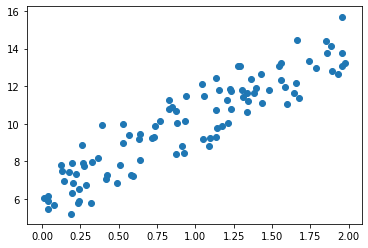

In [4]:
# 릿지
# L2규제를 추가한 회귀모델. L2규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키키 위해서 회귀 계수값을
# 더 작게 만드는 규제 모델

# 라쏘
# L1규제. L1규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것

# 경사 하강법(Gradient Descent)
# 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4x + 6을 근사(w1= 4, w0= 6). 임의의 값은 노이즈를 위해 만듦.
x = 2 * np.random.rand(100, 1)
y = 6 + 4 * x + np.random.randn(100, 1)

# x, y 데이터 세트 산점도로 시각화
plt.scatter(x,y)

In [5]:
N = len(y)
def get_cost(y, y_pred):

    cost = np.sum(np.square(y - y_pred)) / N
    return cost

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# boston 데이터 세트 로드
boston = load_boston()

# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston 데이터 세트의 target 배열은 주태 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함.
bostonDF["PRICE"] = boston.target
print("Boston 데이터 세트 크기 :", bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


row : 0, col: 0
row : 0, col: 1
row : 0, col: 2
row : 0, col: 3
row : 1, col: 0
row : 1, col: 1
row : 1, col: 2
row : 1, col: 3


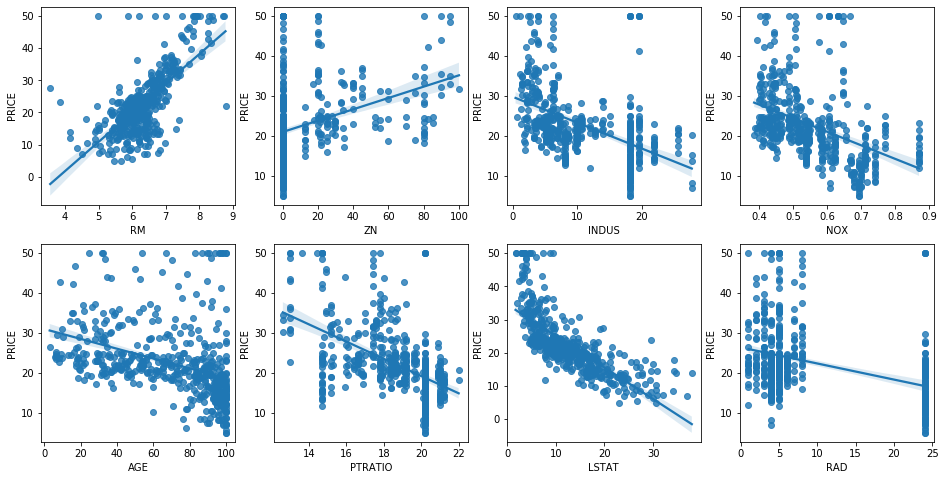

In [10]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 2)
lm_features = ["RM", "ZN", "INDUS", "NOX", "AGE", "PTRATIO", "LSTAT", "RAD"]
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i % 4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y = "PRICE", data=bostonDF, ax = axs[row][col])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF["PRICE"]
x_data = bostonDF.drop("PRICE", axis = 1, inplace = False)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.3,
                                                   random_state = 156)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(x_train, y_train)
y_preds = lr.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print("MSE : {0:.3f}, RMSE : {1:.3f}".format(mse, rmse))
print("Variance score : {0:.3f}".format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [13]:
print("절편 값:", lr.intercept_)
print("회귀 계수값:", np.round(lr.coef_, 1))

절편 값: 40.995595172164336
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [14]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(np.round(lr.coef_, 1), index = x_data.columns)
coeff.sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [17]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF["PRICE"]
x_data = bostonDF.drop(["PRICE"], axis = 1, inplace = False)
lr = LinearRegression()

# cross_val_scroe()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, x_data, y_target, scoring = "neg_mean_squared_error",
                                cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# corss_val_score(scoring = "neg_mean_squared_error")로 반환된 값은 모두 음수
print("5 folds의 개별 Negative MSE scores:", np.round(neg_mse_scores, 2))
print("5 folds의 개별 RMSE scores :", np.round(rmse_scores, 2))
print("5 folds의 평균 RMSE : {0:.3f}".format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores : [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.829


In [18]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1], [2,3]]의 2x2 행렬 생성
x = np.arange(4).reshape(2,2)
print("일차 단항식 계수 피처:\n", x)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(x)
poly_ftr = poly.transform(x)
print("변환된 2차 다항식 계수 피처:\n", poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [19]:
def polynomial_func(x):
    y = 1 + 2*x[:,0] + 3 * x[:,0] ** 2 + 4*x[:,1]** 3
    return y

x = np.arange(4).reshape(2,2)
print("일차 단항식 계수 feature:\n", x)
y = polynomial_func(x)
print("삼차 단항식 결정값:\n", y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 단항식 결정값:
 [  5 125]


In [20]:
# 편향이 높으면 분산이 낮아지고(과소적합)
# 분산이 높으면 편향이 낮아진다(과적합)

# alpha = 0인 경우는 w가 커도 alpha * w가 0이 되어 비용함수는 Min(RSS(W))
# alpha = 무한대인 경우 alpha * w도 무한대가 되므로 비용함수는 w를 0에 가깝게 최소화 해야함.

# 규제(Regularization)
# 비용 함수에 alpha 갑으로 페널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식

# L2 규제(릿지(Ridge))
# w의 제곱에 대해 페널티를 부여하는 방식

# L1 규제(라쏘(Lasso))
# w의 절댓값에 대해 페널티를 부여하는 방식, 여향력이 크지않은 회귀 계수 값을 0으로 변환
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha=10으로 설정해 ㅣㅅ지 회귀 수행.
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, x_data, y_target, 
                                 scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print("5 folds의 개별 Negative MSE scores:", np.round(neg_mse_scores))
print("5 folds의 개별 RMSE scores:", np.round(rmse_scores, 3))
print("5 folds의 평균 RMSE : {0:.3f}".format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-11. -24. -28. -75. -29.]
5 folds의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE : 5.518


In [21]:
# 릿지에 사용될 alpha 파라미터 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 병균 rmse를 구함.
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, x_data, y_target,
                                    scoring = "neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print("alpha {0} 일 떄 5 folds의 평균 RMSE: {1:.3f}".format(alpha, avg_rmse))

alpha 0 일 떄 5 folds의 평균 RMSE: 5.829
alpha 0.1 일 떄 5 folds의 평균 RMSE: 5.788
alpha 1 일 떄 5 folds의 평균 RMSE: 5.653
alpha 10 일 떄 5 folds의 평균 RMSE: 5.518
alpha 100 일 떄 5 folds의 평균 RMSE: 5.330


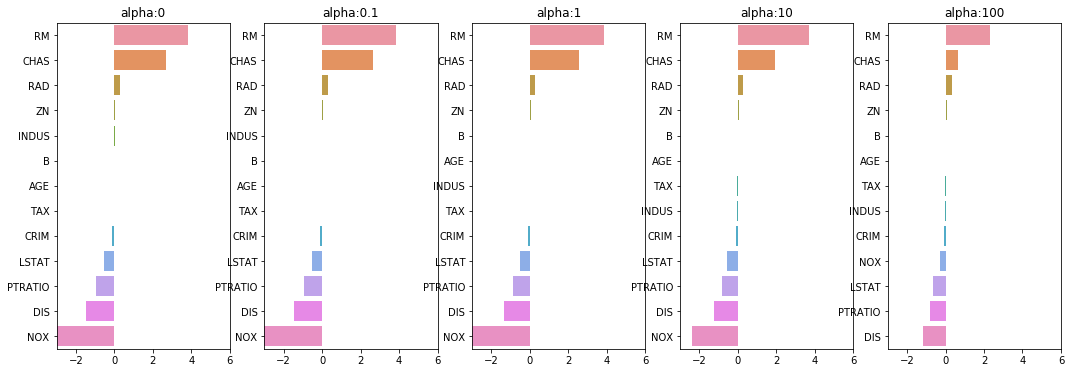

In [23]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18, 6), nrows = 1, ncols = 5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(x_data, y_target)
    # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
    coeff = pd.Series(ridge.coef_, index = x_data.columns)
    colname = "alpha:" + str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending = False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x = coeff.values, y = coeff.index, ax = axs[pos])
    
# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [25]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = "alpha:" +str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending = False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [35]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params = None, x_data_n=None, y_target_n=None, verbose =True):
    coeff_df = pd.DataFrame()
    if verbose: print("#####", model_name, "####")
    for param in params:
        if model_name == "Ridge": model = Ridge(alpha = param)
        elif model_name == "Lasso": model = Lasso(alpha = param)
        elif model_name == "ElasticNet": model = ElasticNet(alpha=param, l1_ratio = 0.7)
        neg_mse_scores = cross_val_score(model, x_data_n, y_target_n,
                                        scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print("alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f}".format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(x_data, y_target)
        # alphad에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
        coeff = pd.Series(model.coef_, index = x_data.columns)
        colname = "alpha:"+str(param)
        coeff_df[colname] = coeff
    return coeff_df
# end of get_linear_regre_eval
# 라쏘에 사용될 alph 파라미터의 값을 정의하고 get_linear_reg_eval()함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval("Lasso", lasso_alphas, x_data, y_target)

##### Lasso ####
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189


In [38]:
# 반환된 coeff_lasso_df를 첫번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_columns = "alpha:"+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by = sort_columns, ascending = False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [40]:
# 엘라스틱넷(Elastic Net)
# 라쏘 회귀가 서로 상관관계가 높은 피처들의 경우에 이들 중에서 중요 피처만을 셀렉션하고 다른 피처들은
# 모두 회귀 계수를 0으로 만드는 성향이 강함 이를 완하하기 위해 L2규제를 라쏘 회귀에 추가한 것

# L1과 L2규제가 결합된 규제로 인해 수행 시간이 상대적을 오래 걸림

# alpha = a(L1) + b(L2)
# l1_ratio = a / (a + b)
# l1_ratio = 0 이면 a가 0이므로 L2규제와 동일
# l1_ratio = 1 이면 b가 0이므로 L1규제와 동일

# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval()함수 호출
# l1_ratio = 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval("ElasticNet", elastic_alphas,
                                      x_data, y_target)

##### ElasticNet ####
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068


In [41]:
# 반환된 coeff_elastic_df를 첫번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = "alpha" + str(elastic_alphas[0])
coeff_elastic_df.sort_values(sort_columns, ascending = False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# 종속변수는 일반적으로 로그 변환을 적용
# method는 표준 정규 분포 변환(Standard), 최댓값/최솟값 정규화(MinMax), 로그변환(Log)결정
# p_degree는 다항식 특성을 추가할 때 적용. p_dgree는 2이상 부여하지 않음.
def get_scaled_data(method = "None", p_degree = None, input_data = None):
    if method == "Standard":
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == "MinMax":
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == "Log":
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
        
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree = p_degree,
                                        include_bias=False).fit_transform(scaled_data)
    return scaled_data

In [49]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출.
alphas = [0.1, 1, 10, 100]

# 5개 방식으로 변환. 먼저 원본 그대로, 표준정규 분포, 표준정규 분포 + 다항식 특성
# 최대/최소 정규화, 최대/최소 정규화 + 다항식 특성, 로그변환
scale_methods = [(None, None), ("Standard", None), ("Standard", 2),
               ("MinMax", None), ("MinMax", 2), ("Log", None)]

for scale_method in scale_methods:
    x_data_scaled = get_scaled_data(method = scale_method[0], p_degree = scale_method[1],
                                   input_data = x_data)
    print("\n## 변환 유형:{0}, Polynomial Degree : {1}".format(scale_method[0], scale_method[1]))
    get_linear_reg_eval("Ridge", alphas, x_data_scaled, y_target)


## 변환 유형:None, Polynomial Degree : None
##### Ridge ####
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330

## 변환 유형:Standard, Polynomial Degree : None
##### Ridge ####
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421

## 변환 유형:Standard, Polynomial Degree : 2
##### Ridge ####
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634

## 변환 유형:MinMax, Polynomial Degree : None
##### Ridge ####
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635

## 변환 유형:MinMax, Polynomial Degree : 2
##### Ridge ####
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.185
alpha 100일 때 5 폴

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [51]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

x_train, x_test, y_train, y_test = train_test_split(data_scaled, cancer.target,
                                                   test_size = 0.3, random_state = 0)

In [52]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용해 학습 및 예측 수행.
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
lr_preds = lr_clf.predict(x_test)

# 정확도와 roc_auc 측정
print("accuracy: {0:.3f}".format(accuracy_score(y_test, lr_preds)))
print("roc_auc: {0:.3f}".format(roc_auc_score(y_test, lr_preds)))

accuracy: 0.977
roc_auc: 0.972


In [55]:
from sklearn.model_selection import GridSearchCV

params = {"penalty": ["l2", "l2"],
        "C": [0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid = params, scoring="accuracy", cv = 3)
grid_clf.fit(data_scaled, cancer.target)
print("최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 : {1:.3f}".format(grid_clf.best_params_,
                                                    grid_clf.best_score_))

최적 하이퍼 파라미터 :{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도 : 0.975
